<a href="https://colab.research.google.com/github/chandhinipj/Sentimental-Analysis/blob/main/Sentimental_Analysis_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SENTIMENT ANALYSIS USING TWITTER DATASET

# Data set Import and Data Cleaning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [ ]:
# import libraries
import pandas as pd
import numpy as np
# libraries for data preprocessing
import nltk
# download modules available with NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# libraries for data split and feature extraction
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# library for evaluation
from sklearn import metrics
# libraries for ML algorithms
from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
# libraries for data plotting
import seaborn as sns
import matplotlib.pyplot as plt 
RANDOM_SEED = 100

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pip install scikit-plot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('/content/train.csv')
df.head(5)

,id,text,sentiment
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
1,088c60f138,my boss is bullying me...,negative
2,9642c003ef,what interview! leave me alone,negative
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive


In [ ]:
df.columns

Index(['id', 'text', 'sentiment'], dtype='object')

In [ ]:
pd.set_option('max_colwidth',1800)
df[df.sentiment == 'negative'][0:5]

,id,text,sentiment
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
1,088c60f138,my boss is bullying me...,negative
2,9642c003ef,what interview! leave me alone,negative
3,358bd9e861,"Sons of ****, why couldn`t they put them on the releases we already bought",negative
7,74a76f6e0a,My Sharpie is running DANGERously low on ink,negative


In [ ]:
import nltk

# download NLTK modules
nltk.download('punkt')  # required for Tokenizers
nltk.download('wordnet')  # required for WordNetLemmatizer
nltk.download('omw-1.4') # required for WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')  # requried for PoS tagger
nltk.download('stopwords')  

from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import string

import spacy
from spacy import displacy
import en_core_web_sm  # spacy model
nlp = en_core_web_sm.load()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df


,id,text,sentiment
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
1,088c60f138,my boss is bullying me...,negative
2,9642c003ef,what interview! leave me alone,negative
3,358bd9e861,"Sons of ****, why couldn`t they put them on the releases we already bought",negative
4,6e0c6d75b1,2am feedings for the baby are fun when he is all smiles and coos,positive
...,...,...,...
16358,b78ec00df5,enjoy ur night,positive
16359,4eac33d1c0,wish we could come see u on Denver husband lost his job and can`t afford it,negative
16360,4f4c4fc327,"I`ve wondered about rake to. The client has made it clear .NET only, don`t force devs to learn a new lang #agile #ccnet",negative
16361,f67aae2310,Yay good for both of you. Enjoy the break - you probably need it after such hectic weekend Take care hun xxxx,positive


In [ ]:
df=df.drop('id', axis=1)

In [ ]:
df

,text,sentiment
0,Sooo SAD I will miss you here in San Diego!!!,negative
1,my boss is bullying me...,negative
2,what interview! leave me alone,negative
3,"Sons of ****, why couldn`t they put them on the releases we already bought",negative
4,2am feedings for the baby are fun when he is all smiles and coos,positive
...,...,...
16358,enjoy ur night,positive
16359,wish we could come see u on Denver husband lost his job and can`t afford it,negative
16360,"I`ve wondered about rake to. The client has made it clear .NET only, don`t force devs to learn a new lang #agile #ccnet",negative
16361,Yay good for both of you. Enjoy the break - you probably need it after such hectic weekend Take care hun xxxx,positive


In [ ]:
df.isnull().sum()

text         0
sentiment    0
dtype: int64

In [ ]:
print(f'Number of entries: {len(df)}')

Number of entries: 16363


In [ ]:
df1=df.copy()
print(f'Number of entries: {len(df1)}')
# drop the rows where at least one element is missing
df1 = df1.dropna()
print(f'Number of entries: {len(df1)}')

Number of entries: 16363
Number of entries: 16363


In [ ]:
df.describe()

,text,sentiment
count,16363,16363
unique,16363,2
top,Sooo SAD I will miss you here in San Diego!!!,positive
freq,1,8582


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# df['sentiment']=le.fit_transform(df['sentiment'])
# df

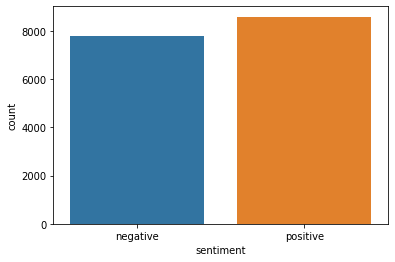

In [ ]:
sns.countplot(df.sentiment)

In [ ]:
# Remove punctuation and special characters
import re
df['text'] = df['text'].str.replace(r'[^\w\s]', '')
df.head(5)

,text,sentiment
0,Sooo SAD I will miss you here in San Diego,0
1,my boss is bullying me,0
2,what interview leave me alone,0
3,Sons of why couldnt they put them on the releases we already bought,0
4,2am feedings for the baby are fun when he is all smiles and coos,1


In [ ]:
import re

def remove_punctuation_and_urls(text):
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    return text

# Apply the function to the "text" column of the Twitter dataset
df['text'] = df['text'].apply(remove_punctuation_and_urls)



In [ ]:
df.head(5)

,text,sentiment
0,Sooo SAD I will miss you here in San Diego,negative
1,my boss is bullying me,negative
2,what interview leave me alone,negative
3,Sons of why couldnt they put them on the releases we already bought,negative
4,2am feedings for the baby are fun when he is all smiles and coos,positive


In [ ]:
# Convert all text to lowercase
df["text"] = df["text"].str.lower()
df.head(5)

,text,sentiment
0,sooo sad i will miss you here in san diego,negative
1,my boss is bullying me,negative
2,what interview leave me alone,negative
3,sons of why couldnt they put them on the releases we already bought,negative
4,2am feedings for the baby are fun when he is all smiles and coos,positive


# Data Preprocessing

In [ ]:
import nltk
nltk.download('punkt')
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# iterate through each row in 'Text' columm and convert text to tokens

tknzr = TweetTokenizer()
#list_tokenised_text = [word_tokenize(text) for text in df['text']]
list_tokenised_text = [tknzr.tokenize(text) for text in df['text']] ##using tweet tokenizer
print(list_tokenised_text[:2])

list_tokenised_sentences = [' '.join(tokens) for tokens in list_tokenised_text]
print(list_tokenised_sentences[:2])

# add new column to data frame
df['Tokenised_Text'] = list_tokenised_sentences
df.head()

[['sooo', 'sad', 'i', 'will', 'miss', 'you', 'here', 'in', 'san', 'diego'], ['my', 'boss', 'is', 'bullying', 'me']]
['sooo sad i will miss you here in san diego', 'my boss is bullying me']


,text,sentiment,Tokenised_Text
0,sooo sad i will miss you here in san diego,negative,sooo sad i will miss you here in san diego
1,my boss is bullying me,negative,my boss is bullying me
2,what interview leave me alone,negative,what interview leave me alone
3,sons of why couldnt they put them on the releases we already bought,negative,sons of why couldnt they put them on the releases we already bought
4,2am feedings for the baby are fun when he is all smiles and coos,positive,2am feedings for the baby are fun when he is all smiles and coos


In [ ]:
# Tokenize the text into tweet
#tknzr = TweetTokenizer()
#df["text_token_tweet"] = df["text"].apply(TweetTokenizer)

#df

In [ ]:
# Tokenize the text into tweet
# df["text_token_word"] = df["text"].apply(word_tokenize)
# df

In [ ]:
# Perform stemming/lemmatization
# stemmer = PorterStemmer()
# df["stemming_text"] = df["text"].apply(lambda x: [stemmer.stem(word) for word in x])
# df

In [ ]:
#stemming

ps = PorterStemmer()
stemming= []
for token in list_tokenised_text:
    stem_words = [ps.stem(word) for word in  token]
# print(f'Stemmed words: {stem_words}\n')

    #stem_words = [ps.stem(word) for word in list_tokenised_text]
    #print(f'Stemmed words: {stem_words}')
    list_Stemmed_sentences= ' '.join(stem_words) 
    stemming.append(list_Stemmed_sentences)
    #print(f'Stemmed sentence: {" ".join(stem_words)}')
  

In [ ]:
df['stemming_text']=stemming

In [ ]:
df

,text,sentiment,Tokenised_Text,stemming_text
0,sooo sad i will miss you here in san diego,negative,sooo sad i will miss you here in san diego,sooo sad i will miss you here in san diego
1,my boss is bullying me,negative,my boss is bullying me,my boss is bulli me
2,what interview leave me alone,negative,what interview leave me alone,what interview leav me alon
3,sons of why couldnt they put them on the rel...,negative,sons of why couldnt they put them on the relea...,son of whi couldnt they put them on the releas...
4,2am feedings for the baby are fun when he is a...,positive,2am feedings for the baby are fun when he is a...,2am feed for the babi are fun when he is all s...
...,...,...,...,...
16358,enjoy ur night,positive,enjoy ur night,enjoy ur night
16359,wish we could come see u on denver husband l...,negative,wish we could come see u on denver husband los...,wish we could come see u on denver husband los...
16360,ive wondered about rake to the client has ma...,negative,ive wondered about rake to the client has made...,ive wonder about rake to the client ha made it...
16361,yay good for both of you enjoy the break you...,positive,yay good for both of you enjoy the break you p...,yay good for both of you enjoy the break you p...


In [ ]:
# Lemmatization

lemmatizer = WordNetLemmatizer()
lemmatised_sentences = []

# iterate through each list of tokens and lemmatise the tokens
for tokens in list_tokenised_text:
  lemma_words = [lemmatizer.lemmatize(word) for word in tokens]
  lemma_sentence = ' '.join(lemma_words)
  lemmatised_sentences.append(lemma_sentence)
  
#print(lemmatised_sentences[:2])

# add new column to data frame
df['Lemmatised_Text'] = lemmatised_sentences

df.head(2)

,text,sentiment,Tokenised_Text,stemming_text,Lemmatised_Text
0,sooo sad i will miss you here in san diego,negative,sooo sad i will miss you here in san diego,sooo sad i will miss you here in san diego,sooo sad i will miss you here in san diego
1,my boss is bullying me,negative,my boss is bullying me,my boss is bulli me,my bos is bullying me


In [ ]:
df

,text,sentiment,Tokenised_Text,stemming_text,Lemmatised_Text
0,sooo sad i will miss you here in san diego,negative,sooo sad i will miss you here in san diego,sooo sad i will miss you here in san diego,sooo sad i will miss you here in san diego
1,my boss is bullying me,negative,my boss is bullying me,my boss is bulli me,my bos is bullying me
2,what interview leave me alone,negative,what interview leave me alone,what interview leav me alon,what interview leave me alone
3,sons of why couldnt they put them on the releases we already bought,negative,sons of why couldnt they put them on the releases we already bought,son of whi couldnt they put them on the releas we alreadi bought,son of why couldnt they put them on the release we already bought
4,2am feedings for the baby are fun when he is all smiles and coos,positive,2am feedings for the baby are fun when he is all smiles and coos,2am feed for the babi are fun when he is all smile and coo,2am feeding for the baby are fun when he is all smile and coo
...,...,...,...,...,...
16358,enjoy ur night,positive,enjoy ur night,enjoy ur night,enjoy ur night
16359,wish we could come see u on denver husband lost his job and cant afford it,negative,wish we could come see u on denver husband lost his job and cant afford it,wish we could come see u on denver husband lost hi job and cant afford it,wish we could come see u on denver husband lost his job and cant afford it
16360,ive wondered about rake to the client has made it clear net only dont force devs to learn a new lang agile ccnet,negative,ive wondered about rake to the client has made it clear net only dont force devs to learn a new lang agile ccnet,ive wonder about rake to the client ha made it clear net onli dont forc dev to learn a new lang agil ccnet,ive wondered about rake to the client ha made it clear net only dont force devs to learn a new lang agile ccnet
16361,yay good for both of you enjoy the break you probably need it after such hectic weekend take care hun xxxx,positive,yay good for both of you enjoy the break you probably need it after such hectic weekend take care hun xxxx,yay good for both of you enjoy the break you probabl need it after such hectic weekend take care hun xxxx,yay good for both of you enjoy the break you probably need it after such hectic weekend take care hun xxxx


In [ ]:

# save updated data frame to a file
df.to_csv('/content/reviews_preprocessed.csv', index=False)

df.head()

,text,sentiment,Tokenised_Text,stemming_text,Lemmatised_Text
0,sooo sad i will miss you here in san diego,negative,sooo sad i will miss you here in san diego,sooo sad i will miss you here in san diego,sooo sad i will miss you here in san diego
1,my boss is bullying me,negative,my boss is bullying me,my boss is bulli me,my bos is bullying me
2,what interview leave me alone,negative,what interview leave me alone,what interview leav me alon,what interview leave me alone
3,sons of why couldnt they put them on the releases we already bought,negative,sons of why couldnt they put them on the releases we already bought,son of whi couldnt they put them on the releas we alreadi bought,son of why couldnt they put them on the release we already bought
4,2am feedings for the baby are fun when he is all smiles and coos,positive,2am feedings for the baby are fun when he is all smiles and coos,2am feed for the babi are fun when he is all smile and coo,2am feeding for the baby are fun when he is all smile and coo


# Text feature extraction and model generation

In [ ]:
# use raw text
X_train_text, X_val_text, y_train, y_val = train_test_split(df['text'], df['sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_text)}')
print(f'validation data set size: {len(X_val_text)}')

# use tokenised text
X_train_tokenised_text, X_val_tokenised_text, y_train, y_val = train_test_split(df['Tokenised_Text'], df['sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_tokenised_text)}')
print(f'validation data set size: {len(X_val_tokenised_text)}')

# use semmatized text
X_train_stemming_text, X_val_stemming_text, y_train, y_val = train_test_split(df['stemming_text'], df['sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_stemming_text)}')
print(f'validation data set size: {len(X_val_stemming_text)}')

# use lemmatised text
X_train_lemmatised_text, X_val_lemmatised_text, y_train, y_val = train_test_split(df['Lemmatised_Text'], df['sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_lemmatised_text)}')
print(f'validation data set size: {len(X_val_lemmatised_text)}')

# define class_names to using with plot_confusion_matrix
class_list = ['positive', 'negative']

training data set size: 11454
validation data set size: 4909
training data set size: 11454
validation data set size: 4909
training data set size: 11454
validation data set size: 4909
training data set size: 11454
validation data set size: 4909


In [ ]:

# method to plot confusion matrix
def plot_confusion_matrix(matrix, class_names):
    plt.clf()
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Set2_r)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    s = [['TP','FN'], ['FP', 'TN']]

    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(matrix[i][j]))
    plt.show()

# method to calculate evaluation results
def evaluate(actuals, predictions, class_names):
  accuracy = metrics.accuracy_score(actuals, predictions)
  confusion_matrix = metrics.confusion_matrix(actuals, predictions, labels=class_names)
  return accuracy, confusion_matrix
     

# Model Generation using the Count Vectorization method and SVM algorithm

In [ ]:
# method to train and predict using SVM classifier
def get_svm_predictions(X_train, X_val, y_train, y_val, class_names):
  # build model
  clf = svm.SVC(kernel='linear', random_state=RANDOM_SEED) 
  clf.fit(X_train, y_train)

  # Make predictions on test data
  y_pred = clf.predict(X_val)

  # evalution
  accuracy, confusion_matrix = evaluate(y_val, y_pred, class_names)
  print(f'Accuracy: {accuracy}')
  plot_confusion_matrix(confusion_matrix, class_names)

  return clf

## MODEL 1

Accuracy: 0.8592381340395192


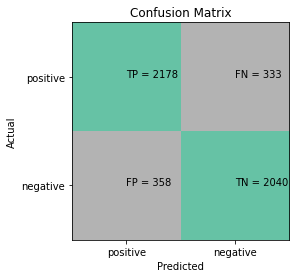

SVC(kernel='linear', random_state=100)

In [ ]:
# Train Test Split for the model 1 [Raw Text]

vectorizer = CountVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_text,X_val_text)
# vectorizer.fit(X_train_text,X_val_text)
# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_text)
X_val = vectorizer.transform(X_val_text)

m1 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)
m1

## MODEL 2

Accuracy: 0.8598492564677124


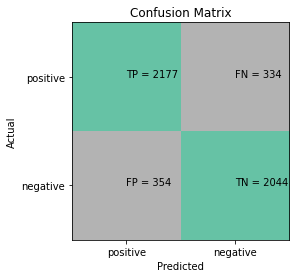

In [ ]:
# Train Test Split for the model 1 [tokenised_text]

vectorizer = CountVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_tokenised_text,X_val_tokenised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_tokenised_text)
X_val = vectorizer.transform(X_val_tokenised_text)

m2 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

## MODEL 3

Accuracy: 0.8590344265634549


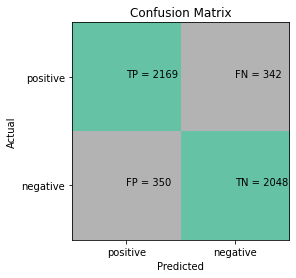

In [ ]:
# Train Test Split for the model 1 [stemming_text]

vectorizer = CountVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_stemming_text,X_val_stemming_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_stemming_text)
X_val = vectorizer.transform(X_val_stemming_text)

m3 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

## MODEL 4

Accuracy: 0.8602566714198411


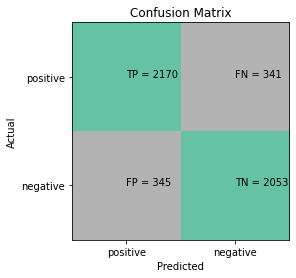

In [ ]:
# Train Test Split for the model 1 [lemmatised_text]

vectorizer = CountVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_lemmatised_text,X_val_lemmatised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_lemmatised_text)
X_val = vectorizer.transform(X_val_lemmatised_text)

m4 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

# Model Generation using the TF-IDF vector method and SVM algorithm

## MODEL 1

Accuracy: 0.8661641882257078


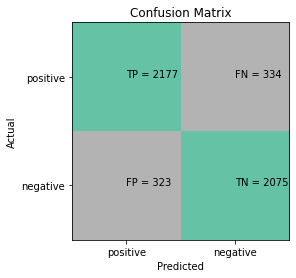

In [ ]:
#TF-IDF vector
# Train Test Split for the model 1 [Raw Text]

vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_text,X_val_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_text)
X_val = vectorizer.transform(X_val_text)

m2 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)


## MODEL 2

Accuracy: 0.8657567732735791


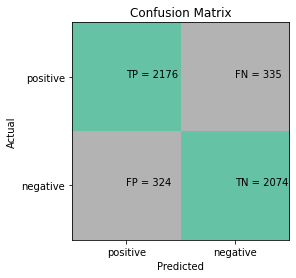

In [ ]:
#TF-IDF vector
# Train Test Split for the model 1 [tokenised_text]

vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_tokenised_text,X_val_tokenised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_tokenised_text)
X_val = vectorizer.transform(X_val_tokenised_text)

m2 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)


## MODEL 3

Accuracy: 0.8755347321246689


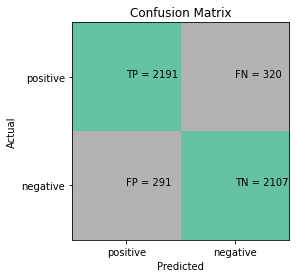

In [ ]:
# Train Test Split for the model 1 [stemming_text]

vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_stemming_text,X_val_stemming_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_stemming_text)
X_val = vectorizer.transform(X_val_stemming_text)

m7 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)


## MODEL 4

Accuracy: 0.8653493583214504


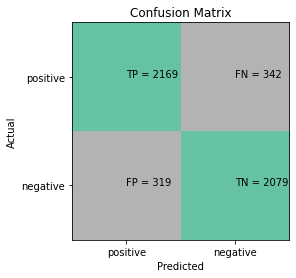

In [ ]:
# Train Test Split for the model 1 [lemmatised_text]

vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_lemmatised_text,X_val_lemmatised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_lemmatised_text)
X_val = vectorizer.transform(X_val_lemmatised_text)

m4 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

The best model is TF-IDF Model 3
Model M3
Data preprocessing - lower casing, punctuation removal, stemming
Features - tf-idf vector (1-grams)
Algorithm - SVM

# Prediction on test data

In [ ]:
import pandas as pd
data_Prediction = pd.DataFrame()
data_Prediction1 = pd.read_csv('/content/test.csv')
#data_Prediction1.drop('id', axis=1 , inplace = True)
data_Prediction['text'] = data_Prediction1['text']
data_Prediction['text'] = data_Prediction1['text'].str.lower()


# df_Prediction['text'] = df_Prediction['text'].str.replace(r'[^\w\s]+', '') # Removing punctuations
# df_Prediction['text'] = df_Prediction['text'].str.replace(r'http\S+', '')  # Removing URL
# df_Prediction['text'] = df_Prediction['text'].str.replace(r'[^\w\s]', '')

In [ ]:
data_Prediction

,text
0,shanghai is also really exciting (precisely -- skyscrapers galore). good tweeps in china: (sh) (bj).
1,"recession hit veronique branquinho, she has to quit her company, such a shame!"
2,happy bday!
3,http://twitpic.com/4w75p - i like it!!
4,that`s great!! weee!! visitors!
...,...
995,haha...yay!!! i`m cured!!!!
996,"sick, sick, sick. this sucks. i can`t even breathe properly"
997,adding names to my twitter account and learning how to use this amazing thing!
998,ooh thats an early start ive got bed planned for that time..ha..loveyoujonesy ****


In [ ]:
data_Prediction1

,id,text
0,96d74cb729,Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China: (SH) (BJ).
1,eee518ae67,"Recession hit Veronique Branquinho, she has to quit her company, such a shame!"
2,01082688c6,happy bday!
3,33987a8ee5,http://twitpic.com/4w75p - I like it!!
4,726e501993,that`s great!! weee!! visitors!
...,...,...
995,9b210c4a6f,Haha...YAY!!! I`M CURED!!!!
996,68c674acdb,"Sick, sick, sick. This sucks. i can`t even breathe properly"
997,6cadda7b98,Adding names to my Twitter account and learning how to use this amazing thing!
998,79a28b1ac7,ooh thats an early start ive got bed planned for that time..ha..LoveYouJonesy ****


In [ ]:
data = pd.read_csv('/content/test.csv')

dataCV = data.copy()
dataCV.drop('text', axis=1 , inplace = True)
dataTF_IDF = dataCV.copy()

data.drop('id', axis=1 , inplace = True)
data

,text
0,Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China: (SH) (BJ).
1,"Recession hit Veronique Branquinho, she has to quit her company, such a shame!"
2,happy bday!
3,http://twitpic.com/4w75p - I like it!!
4,that`s great!! weee!! visitors!
...,...
995,Haha...YAY!!! I`M CURED!!!!
996,"Sick, sick, sick. This sucks. i can`t even breathe properly"
997,Adding names to my Twitter account and learning how to use this amazing thing!
998,ooh thats an early start ive got bed planned for that time..ha..LoveYouJonesy ****


In [ ]:
dataTF_IDF

,id
0,96d74cb729
1,eee518ae67
2,01082688c6
3,33987a8ee5
4,726e501993
...,...
995,9b210c4a6f
996,68c674acdb
997,6cadda7b98
998,79a28b1ac7


In [ ]:

import re

def remove_punctuation_and_urls(text):
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    return text

# Apply the function to the "text" column of the Twitter dataset
data['text'] = data['text'].apply(remove_punctuation_and_urls)
data

,text
0,Shanghai is also really exciting precisely skyscrapers galore Good tweeps in China SH BJ
1,Recession hit Veronique Branquinho she has to quit her company such a shame
2,happy bday
3,I like it
4,thats great weee visitors
...,...
995,HahaYAY IM CURED
996,Sick sick sick This sucks i cant even breathe properly
997,Adding names to my Twitter account and learning how to use this amazing thing
998,ooh thats an early start ive got bed planned for that timehaLoveYouJonesy


In [ ]:
# Convert all text to lowercase
data["text"] = data["text"].str.lower()

data

,text
0,shanghai is also really exciting precisely skyscrapers galore good tweeps in china sh bj
1,recession hit veronique branquinho she has to quit her company such a shame
2,happy bday
3,i like it
4,thats great weee visitors
...,...
995,hahayay im cured
996,sick sick sick this sucks i cant even breathe properly
997,adding names to my twitter account and learning how to use this amazing thing
998,ooh thats an early start ive got bed planned for that timehaloveyoujonesy


training data set size: 11454
validation data set size: 4909
Accuracy: 0.8755347321246689


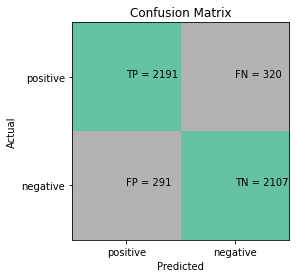

In [ ]:
# TF-IDF VECTORIZATION 

tweet = TweetTokenizer()
Token_words = [tweet.tokenize(text) for text in data['text']]
Token_Sentence = [' '.join(token) for token in Token_words ]

Stem = PorterStemmer()
Stemming = []
for token in Token_words:
  Stem_Token = [Stem.stem(word) for word in token ] 
  Join_Stem_Token = ' '.join(Stem_Token)
  Stemming.append(Join_Stem_Token)

# Train Test Split for the model 3 [stemmitized Text]
# use semmatized text
X_train_stemming_text, X_val_stemming_text, y_train, y_val = train_test_split(df['stemming_text'], df['sentiment'], test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train_stemming_text)}')
print(f'validation data set size: {len(X_val_stemming_text)}')

# Train Test Split for the model 1 [stemming_text]

vectorizer = TfidfVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_stemming_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_stemming_text)
X_val = vectorizer.transform(X_val_stemming_text)

m7 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)



## Prediction

In [ ]:
X_test = vectorizer.transform(Stemming)
predictions = m7.predict(X_test)
print(predictions)


['positive' 'negative' 'positive' 'positive' 'positive' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'positive' 'negative' 'negative' 'negative' 'negative'
 'positive' 'positive' 'negative' 'positive' 'positive' 'negative'
 'negative' 'negative' 'negative' 'positive' 'positive' 'negative'
 'positive' 'negative' 'positive' 'positive' 'positive' 'negative'
 'negative' 'positive' 'negative' 'positive' 'positive' 'positive'
 'negative' 'negative' 'negative' 'positive' 'positive' 'positive'
 'positive' 'negative' 'negative' 'negative' 'positive' 'positive'
 'negative' 'positive' 'positive' 'negative' 'positive' 'negative'
 'positive' 'negative' 'positive' 'positive' 'negative' 'negative'
 'negative' 'positive' 'positive' 'positive' 'positive' 'negative'
 'negative' 'positive' 'positive' 'positive' 'negative' 'negative'
 'positive' 'positive' 'negative' 'positive' 'negative' 'negative'
 'positive' 'positive' 'positive' 'negative' 'negative' 'posit

In [ ]:
dataTF_IDF

,id
0,96d74cb729
1,eee518ae67
2,01082688c6
3,33987a8ee5
4,726e501993
...,...
995,9b210c4a6f
996,68c674acdb
997,6cadda7b98
998,79a28b1ac7


In [ ]:
#X_test = vectorizer.transform(Stemming)
dataTF_IDF['predictions'] = predictions

In [ ]:
dataTF_IDF

,id,predictions
0,96d74cb729,positive
1,eee518ae67,negative
2,01082688c6,positive
3,33987a8ee5,positive
4,726e501993,positive
...,...,...
995,9b210c4a6f,positive
996,68c674acdb,negative
997,6cadda7b98,positive
998,79a28b1ac7,positive


In [ ]:
dataTF_IDF.to_csv('/content/tfidf-test-predictions.csv', index=False)

training data set size: 11454
validation data set size: 4909
Accuracy: 0.8602566714198411


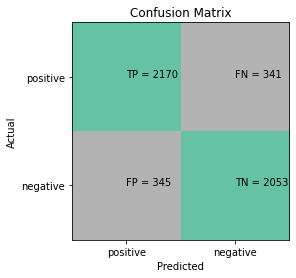

In [ ]:
# Count VECTORIZATION 

tweet = TweetTokenizer()
Token_words = [tweet.tokenize(text) for text in data['text']]
Token_Sentence = [' '.join(token) for token in Token_words ]

lemmatizer = WordNetLemmatizer()
lemmatised_sentences = []

# iterate through each list of tokens and lemmatise the tokens
for tokens in Token_words:
  lemma_words = [lemmatizer.lemmatize(word) for word in tokens]
  lemma_sentence = ' '.join(lemma_words)
  lemmatised_sentences.append(lemma_sentence)


# Train Test Split for the model 4 [Lemmatised Text]

# use lemmatised text
X_train_lemmatised_text, X_val_lemmatised_text, y_train, y_val = train_test_split(df['Lemmatised_Text'], df['sentiment'], test_size=0.3, random_state=RANDOM_SEED)
print(f'training data set size: {len(X_train_lemmatised_text)}')
print(f'validation data set size: {len(X_val_lemmatised_text)}')

# Train Test Split for the model 1 [stemming_text]

vectorizer = CountVectorizer()  # default: lowercase=True, ngram_range=(1,1)
vectorizer.fit(X_train_lemmatised_text)

# convert train and test text data to numeric vectors
X_train = vectorizer.transform(X_train_lemmatised_text)
X_val = vectorizer.transform(X_val_lemmatised_text)

m4 = get_svm_predictions(X_train, X_val, y_train, y_val, class_list)

In [ ]:
dataCV

,id
0,96d74cb729
1,eee518ae67
2,01082688c6
3,33987a8ee5
4,726e501993
...,...
995,9b210c4a6f
996,68c674acdb
997,6cadda7b98
998,79a28b1ac7


In [ ]:
X_test1 = vectorizer.transform(lemmatised_sentences)
predictions = m4.predict(X_test1)


In [ ]:
len(predictions)

1000

In [ ]:
dataCV

,id
0,96d74cb729
1,eee518ae67
2,01082688c6
3,33987a8ee5
4,726e501993
...,...
995,9b210c4a6f
996,68c674acdb
997,6cadda7b98
998,79a28b1ac7


In [ ]:
dataCV['predictions'] = predictions
dataCV

,id,predictions
0,96d74cb729,positive
1,eee518ae67,negative
2,01082688c6,positive
3,33987a8ee5,positive
4,726e501993,positive
...,...,...
995,9b210c4a6f,negative
996,68c674acdb,negative
997,6cadda7b98,positive
998,79a28b1ac7,positive


In [ ]:
dataCV.to_csv('/content/cv-test-predictions.csv', index=False)

In [ ]:
# Created by Hansi at 12/16/2022
import json

import pandas as pd

test_file_path = "/content/tfidf-test-predictions.csv"
df_test = pd.read_csv(test_file_path)
df_test = df_test[["id", "predictions"]]

data = []
for index, row in df_test.iterrows():
    data.append({'id': row['id'], 'prediction': row['predictions']})

print(data[0:5])

submission_file_path = "submission.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data))


[{'id': '96d74cb729', 'prediction': 'positive'}, {'id': 'eee518ae67', 'prediction': 'negative'}, {'id': '01082688c6', 'prediction': 'positive'}, {'id': '33987a8ee5', 'prediction': 'positive'}, {'id': '726e501993', 'prediction': 'positive'}]
